# Tahu lah apa ini?

In [2]:
# Path to google drive folder
# %cd /content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002. Laporan-eksperimen
# %cd /content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002.Experiment_SWI_16052024/

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import OneClassSVM

In [10]:
# Load the dataset
# file_path = '01.Dataset-Rofiqul/agriculture_dataset.csv'
# file_path = '01.Dataset-Rofiqul/Ujicoba3-29052024/agriculture_dataset.csv'
file_path = 'dataset/agriculture_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for review
# data.head(),data.info(),data.describe()

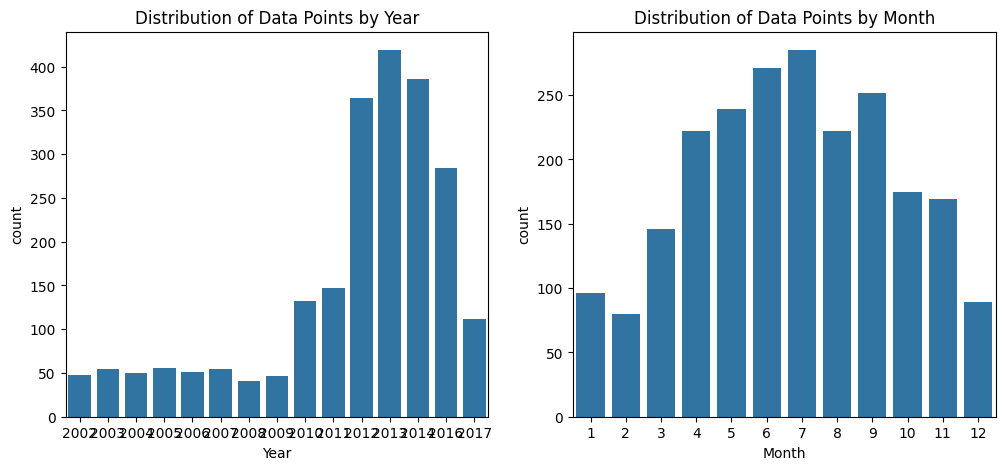

Unique values in Experiment: ['BCSE_KBS' 'Arlington WI' 'MCSE-T2']
Experiment
BCSE_KBS        1094
MCSE-T2          670
Arlington WI     482
Name: count, dtype: int64


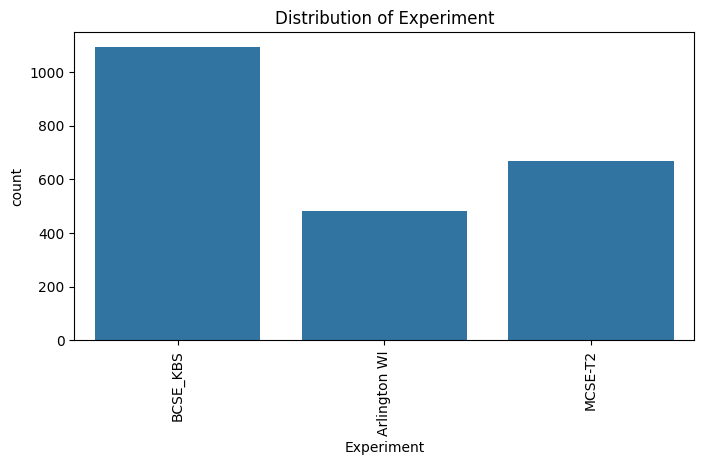

Unique values in DataUse: ['Building' 'Testing']
DataUse
Building    1576
Testing      670
Name: count, dtype: int64


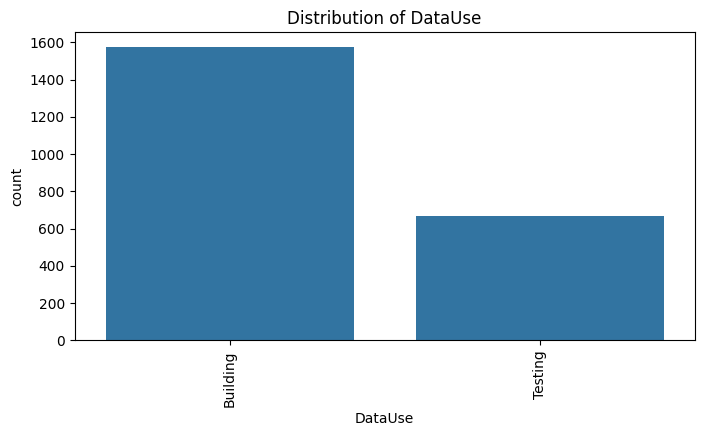

Unique values in Replication: ['R1' 'R2' 'R3' 'R5' 'R4']
Replication
R1    1350
R2     268
R3     266
R4     265
R5      97
Name: count, dtype: int64


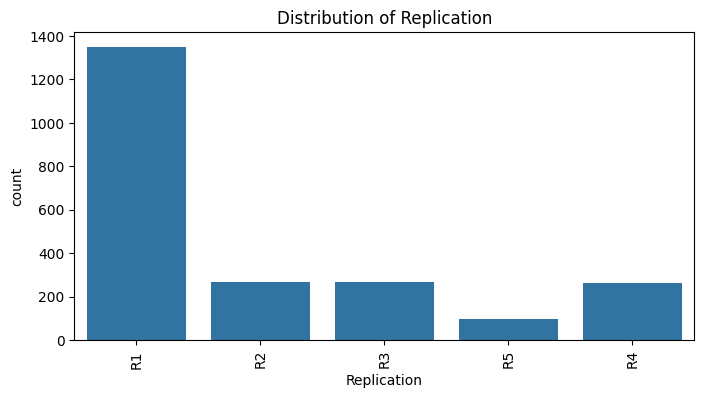

Unique values in Vegetation: ['Corn' 'GLYMX' 'TRIAE']
Vegetation
Corn     1845
GLYMX     204
TRIAE     197
Name: count, dtype: int64


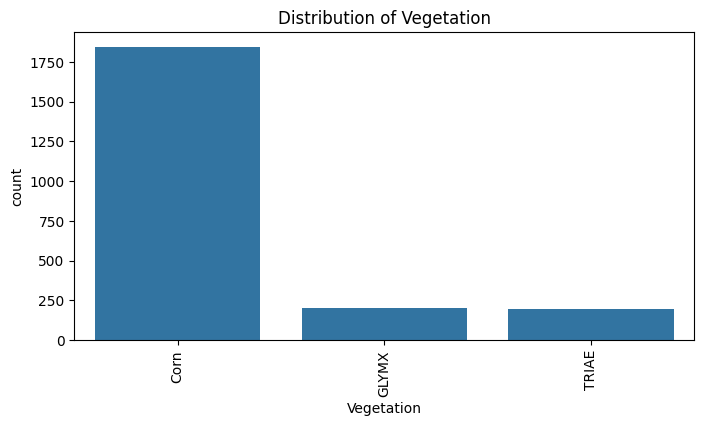

Unique values in VegType: ['Annual']
VegType
Annual    2246
Name: count, dtype: int64


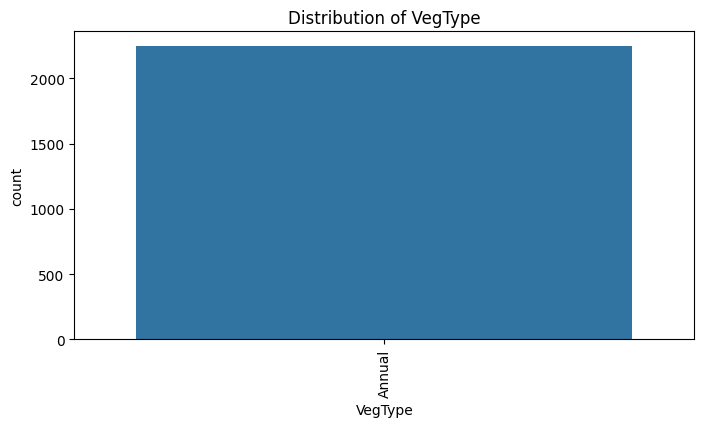

Summary statistics for N2O:
count    2246.000000
mean        7.468610
std        28.488257
min        -7.415297
25%         0.504316
50%         1.972058
75%         5.187618
max       593.072000
Name: N2O, dtype: float64


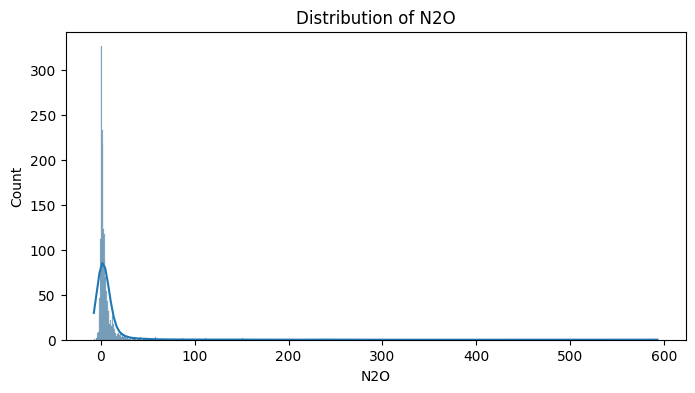

Summary statistics for N_rate:
count    2246.000000
mean      142.994212
std        56.130412
min         0.000000
25%       135.000000
50%       170.000000
75%       170.000000
max       213.000000
Name: N_rate, dtype: float64


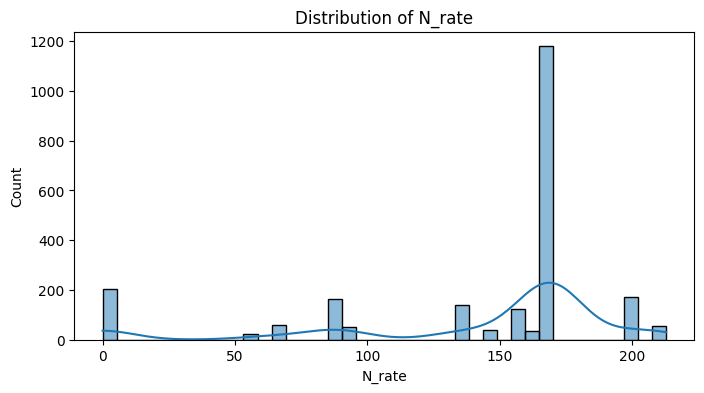

Summary statistics for PP2:
count    2246.000000
mean        5.219839
std        10.064123
min         0.000000
25%         0.000000
50%         0.510000
75%         6.000000
max        95.250000
Name: PP2, dtype: float64


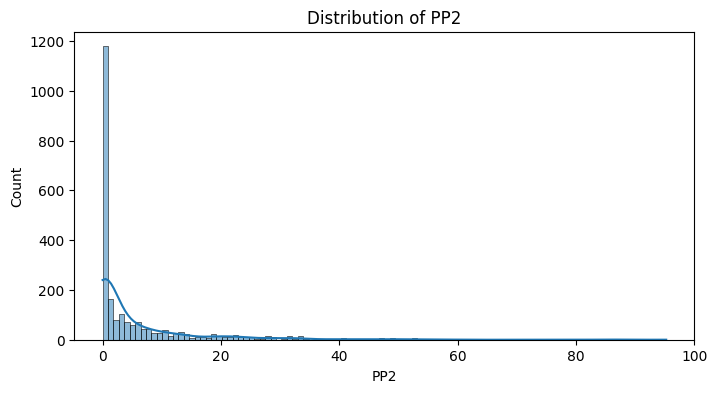

Summary statistics for PP7:
count    2246.000000
mean       19.245273
std        23.723416
min         0.000000
25%         3.560000
50%        11.930000
75%        27.000000
max       260.090000
Name: PP7, dtype: float64


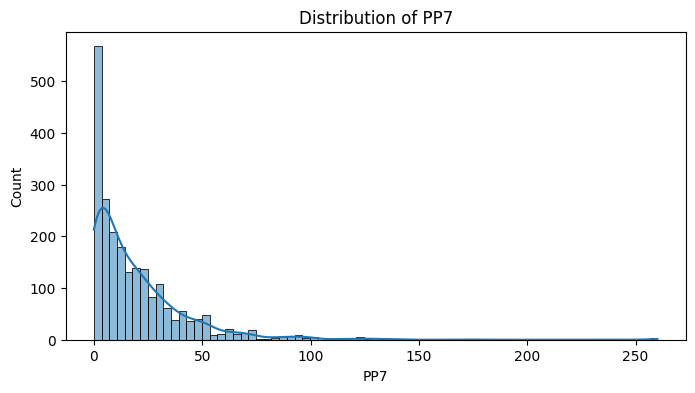

Summary statistics for AirT:
count    2246.000000
mean       12.408699
std         9.490152
min       -20.700000
25%         5.940000
50%        14.490000
75%        20.070000
max        30.700000
Name: AirT, dtype: float64


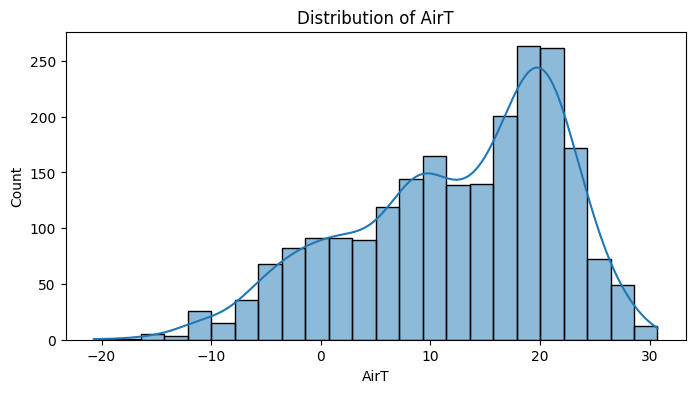

Summary statistics for WFPS25cm:
count    2194.000000
mean        0.531047
std         0.171868
min         0.024388
25%         0.390203
50%         0.553853
75%         0.680321
max         0.912113
Name: WFPS25cm, dtype: float64


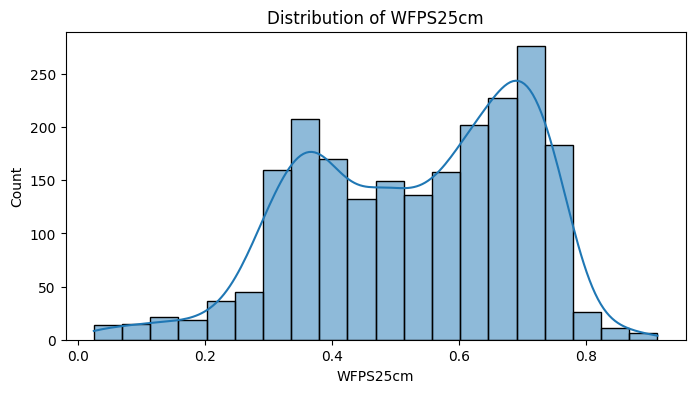

Summary statistics for NH4:
count    2170.000000
mean       11.451364
std        13.214895
min         1.383393
25%         5.290323
50%         9.081282
75%        12.140325
max       228.525000
Name: NH4, dtype: float64


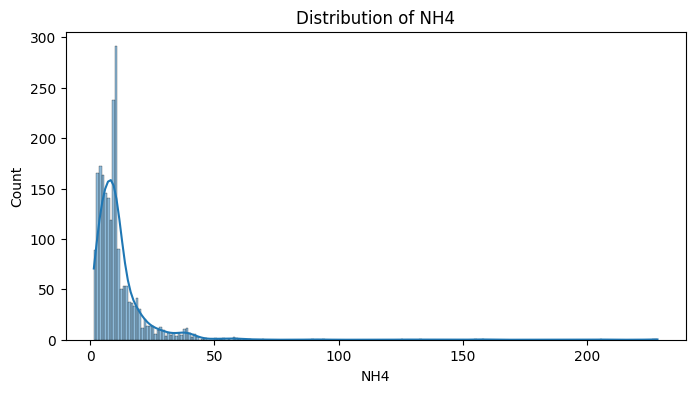

Summary statistics for NO3:
count    2216.000000
mean       24.997063
std        24.941785
min         0.370070
25%        10.184722
50%        19.795863
75%        27.085459
max       238.920000
Name: NO3, dtype: float64


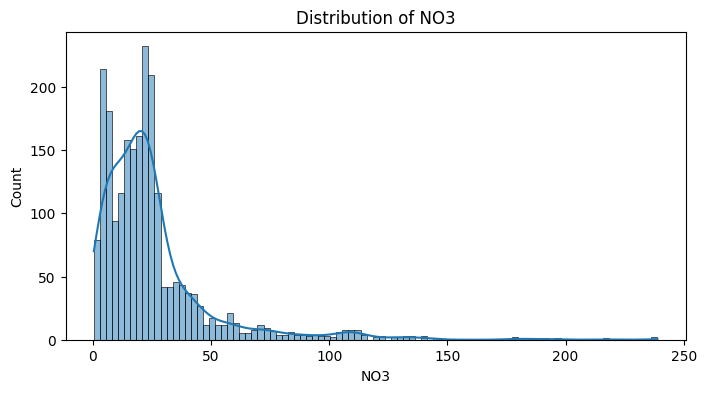

Summary statistics for Clay:
count    2246.000000
mean      134.425163
std        79.564891
min        62.500000
25%        62.500000
50%       128.333333
75%       183.250000
max       280.000000
Name: Clay, dtype: float64


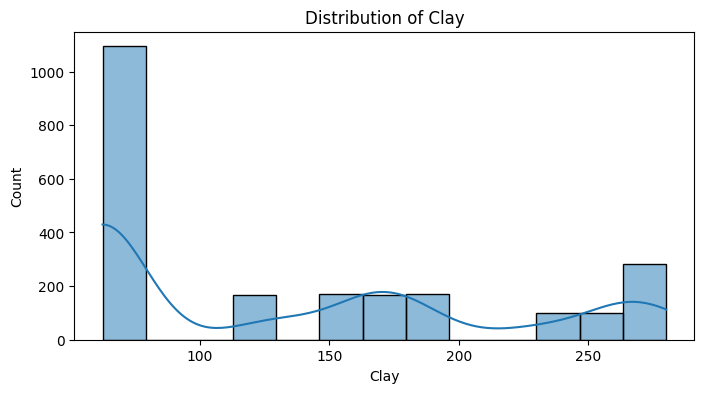

Summary statistics for Sand:
count    2246.000000
mean      462.686739
std       219.451957
min        55.000000
25%       418.833333
50%       491.666667
75%       637.500000
max       637.500000
Name: Sand, dtype: float64


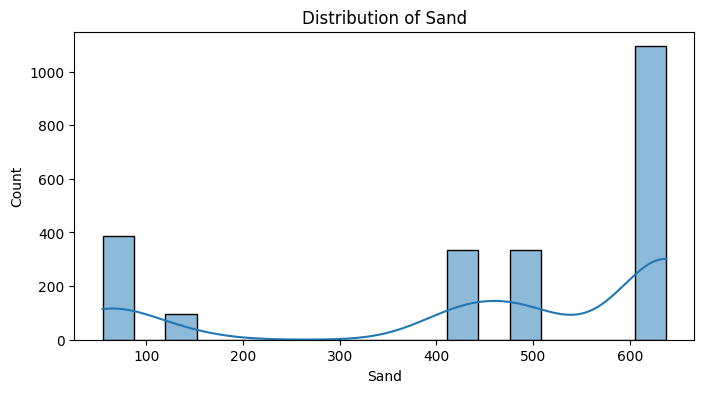

Summary statistics for SOM:
count    2246.000000
mean        1.901503
std         1.132896
min         1.174072
25%         1.174072
50%         1.186800
75%         1.823200
max         4.500000
Name: SOM, dtype: float64


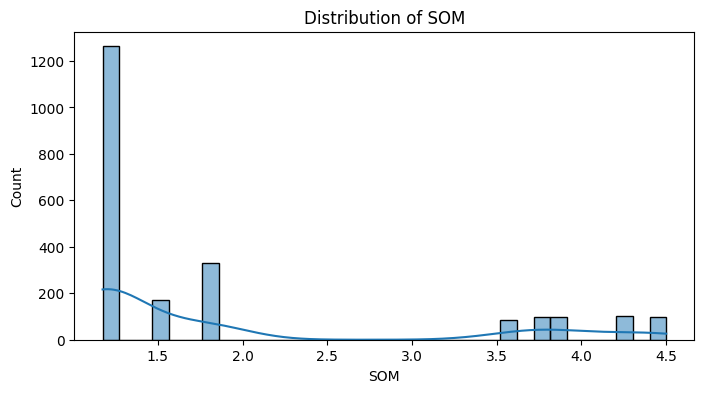

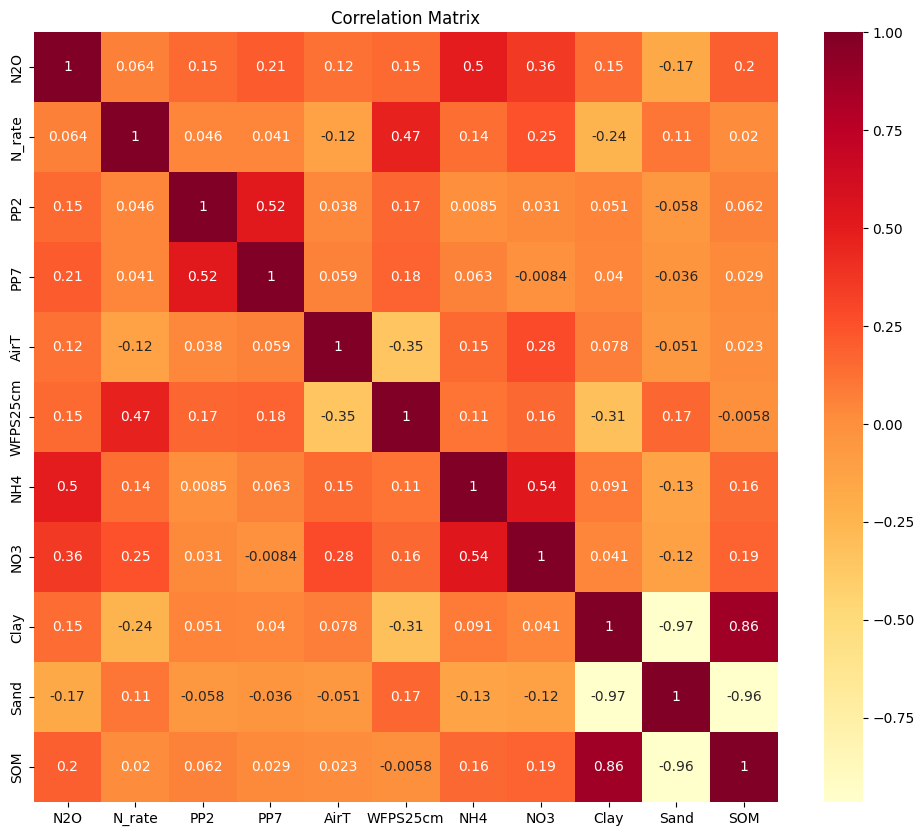

In [15]:
# Assuming the data is in a CSV file
# df = pd.read_csv('dataset.csv')
# 
# 1. Explore the overall dataset
# print(data.info())
# print(data.describe())

# 2. Explore the date-related columns
# data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Plot the distribution of data points across years and months
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='Year', data=data, ax=ax1)
ax1.set_title('Distribution of Data Points by Year')
sns.countplot(x='Month', data=data, ax=ax2)
ax2.set_title('Distribution of Data Points by Month')
plt.show()

# 3. Explore the categorical columns
categorical_cols = ['Experiment', 'DataUse', 'Replication', 'Vegetation', 'VegType']
for col in categorical_cols:
    print(f'Unique values in {col}: {data[col].unique()}')
    print(data[col].value_counts())
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

# 4. Explore the numerical columns
numerical_cols = ['N2O', 'N_rate', 'PP2', 'PP7', 'AirT', 'WFPS25cm', 'NH4', 'NO3', 'Clay', 'Sand', 'SOM']
for col in numerical_cols:
    print(f'Summary statistics for {col}:')
    print(data[col].describe())
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# 5. Explore the relationships between variables
plt.figure(figsize=(12, 10))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()

           count                           mean                  min  \
Date        2246  2012-06-10 21:31:53.802315264  2002-03-27 00:00:00   
Year      2246.0                      2011.9252               2002.0   
Month     2246.0                       6.731523                  1.0   
N2O       2246.0                        7.46861            -7.415297   
N_rate    2246.0                     142.994212                  0.0   
PP2       2246.0                       5.219839                  0.0   
PP7       2246.0                      19.245273                  0.0   
AirT      2246.0                      12.408699                -20.7   
DAF_TD    2246.0                     195.321015                  1.0   
DAF_SD    2246.0                     198.898041                  0.0   
WFPS25cm  2194.0                       0.531047             0.024388   
NH4       2170.0                      11.451364             1.383393   
NO3       2216.0                      24.997063              0.3

IndexError: index 6 is out of bounds for axis 0 with size 6

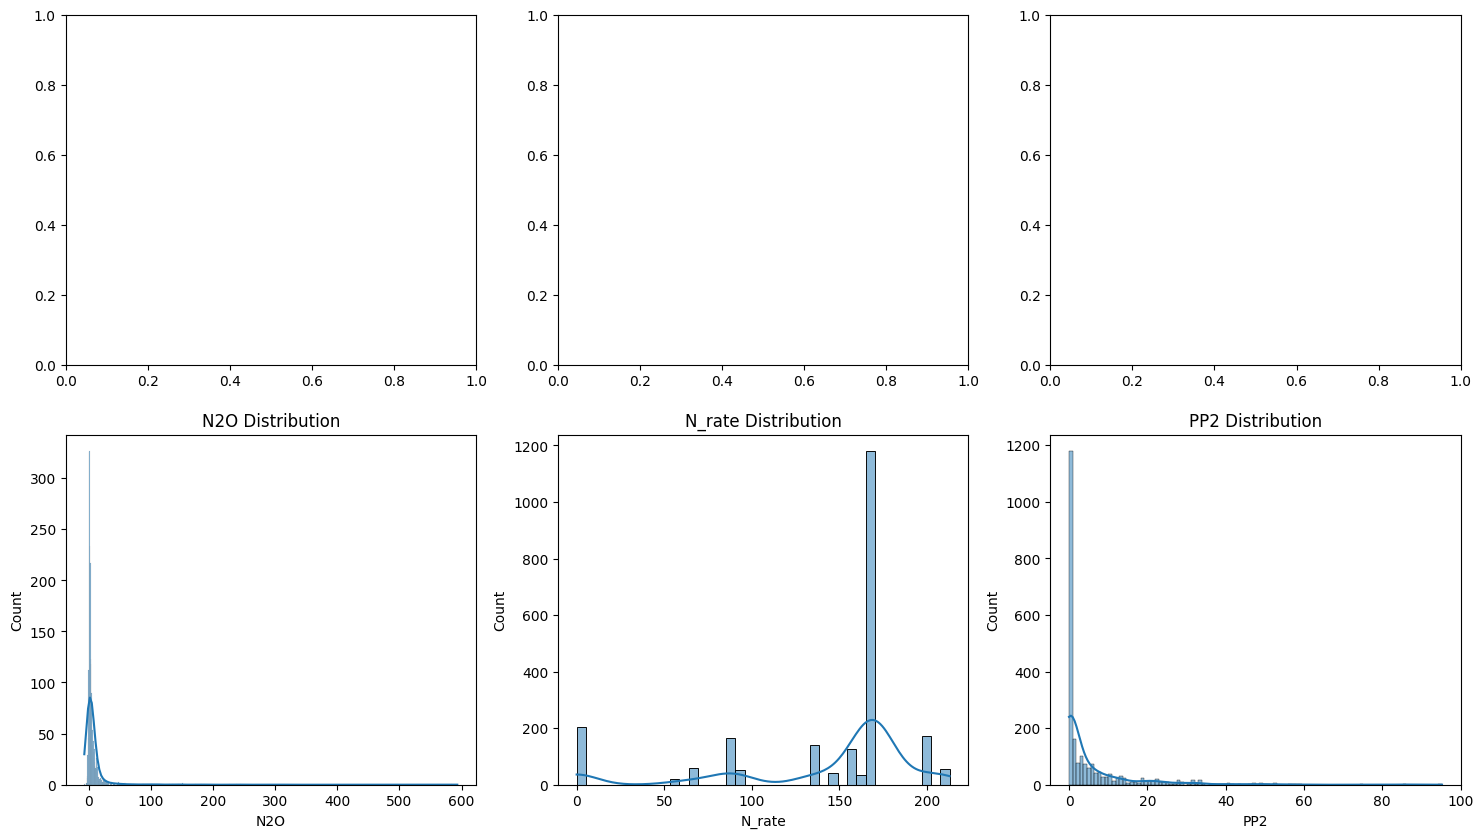

In [19]:
# 1. Generate the statistics table
stats = data.describe().T
stats['Unique Values'] = data.nunique()
stats['Missing Values'] = data.isnull().sum()
stats['Missing %'] = (data.isnull().sum() / len(data)) * 100
print(stats)

# 2. Visualize the statistics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Plot the distribution of numerical columns
for i, col in enumerate(stats.index):
    if col in ['N2O', 'N_rate', 'PP2', 'PP7', 'AirT', 'WFPS25cm', 'NH4', 'NO3', 'Clay', 'Sand', 'SOM']:
        sns.histplot(data[col], kde=True, ax=axes[i])
        axes[i].set_title(f'{col} Distribution')

# Plot the count of unique values for categorical columns
for i, col in enumerate(stats.index):
    if col in ['Experiment', 'DataUse', 'Replication', 'Vegetation', 'VegType']:
        data[col].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'{col} Counts')

plt.tight_layout()
plt.show()

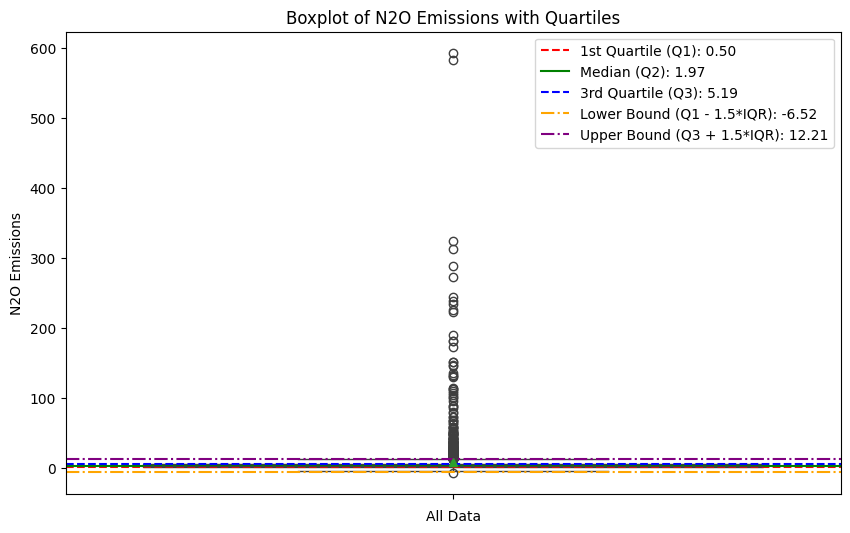

In [16]:


# Assuming your data is already loaded into a DataFrame called 'data'

# Generate a box plot for N2O with quartile divisions
plt.figure(figsize=(10, 6))

# Boxplot for N2O with quartiles
sns.boxplot(y='N2O', data=data, showmeans=True)
plt.title('Boxplot of N2O Emissions with Quartiles')
plt.ylabel('N2O Emissions')
plt.xlabel('All Data')

# Calculate quartiles and IQR
q1 = data['N2O'].quantile(0.25)
q2 = data['N2O'].median()
q3 = data['N2O'].quantile(0.75)
iqr = q3 - q1

# Adding horizontal lines for quartiles and IQR
plt.axhline(q1, color='r', linestyle='--', label=f'1st Quartile (Q1): {q1:.2f}')
plt.axhline(q2, color='g', linestyle='-', label=f'Median (Q2): {q2:.2f}')
plt.axhline(q3, color='b', linestyle='--', label=f'3rd Quartile (Q3): {q3:.2f}')
plt.axhline(q1 - 1.5 * iqr, color='orange', linestyle='-.', label=f'Lower Bound (Q1 - 1.5*IQR): {q1 - 1.5 * iqr:.2f}')
plt.axhline(q3 + 1.5 * iqr, color='purple', linestyle='-.', label=f'Upper Bound (Q3 + 1.5*IQR): {q3 + 1.5 * iqr:.2f}')

plt.legend()
plt.show()

Number of outliers per column:
N2O         32
N_rate       0
PP2         47
PP7         38
AirT         3
WFPS25cm     0
NH4         23
NO3         64
Clay         0
Sand         0
SOM          0
dtype: int64


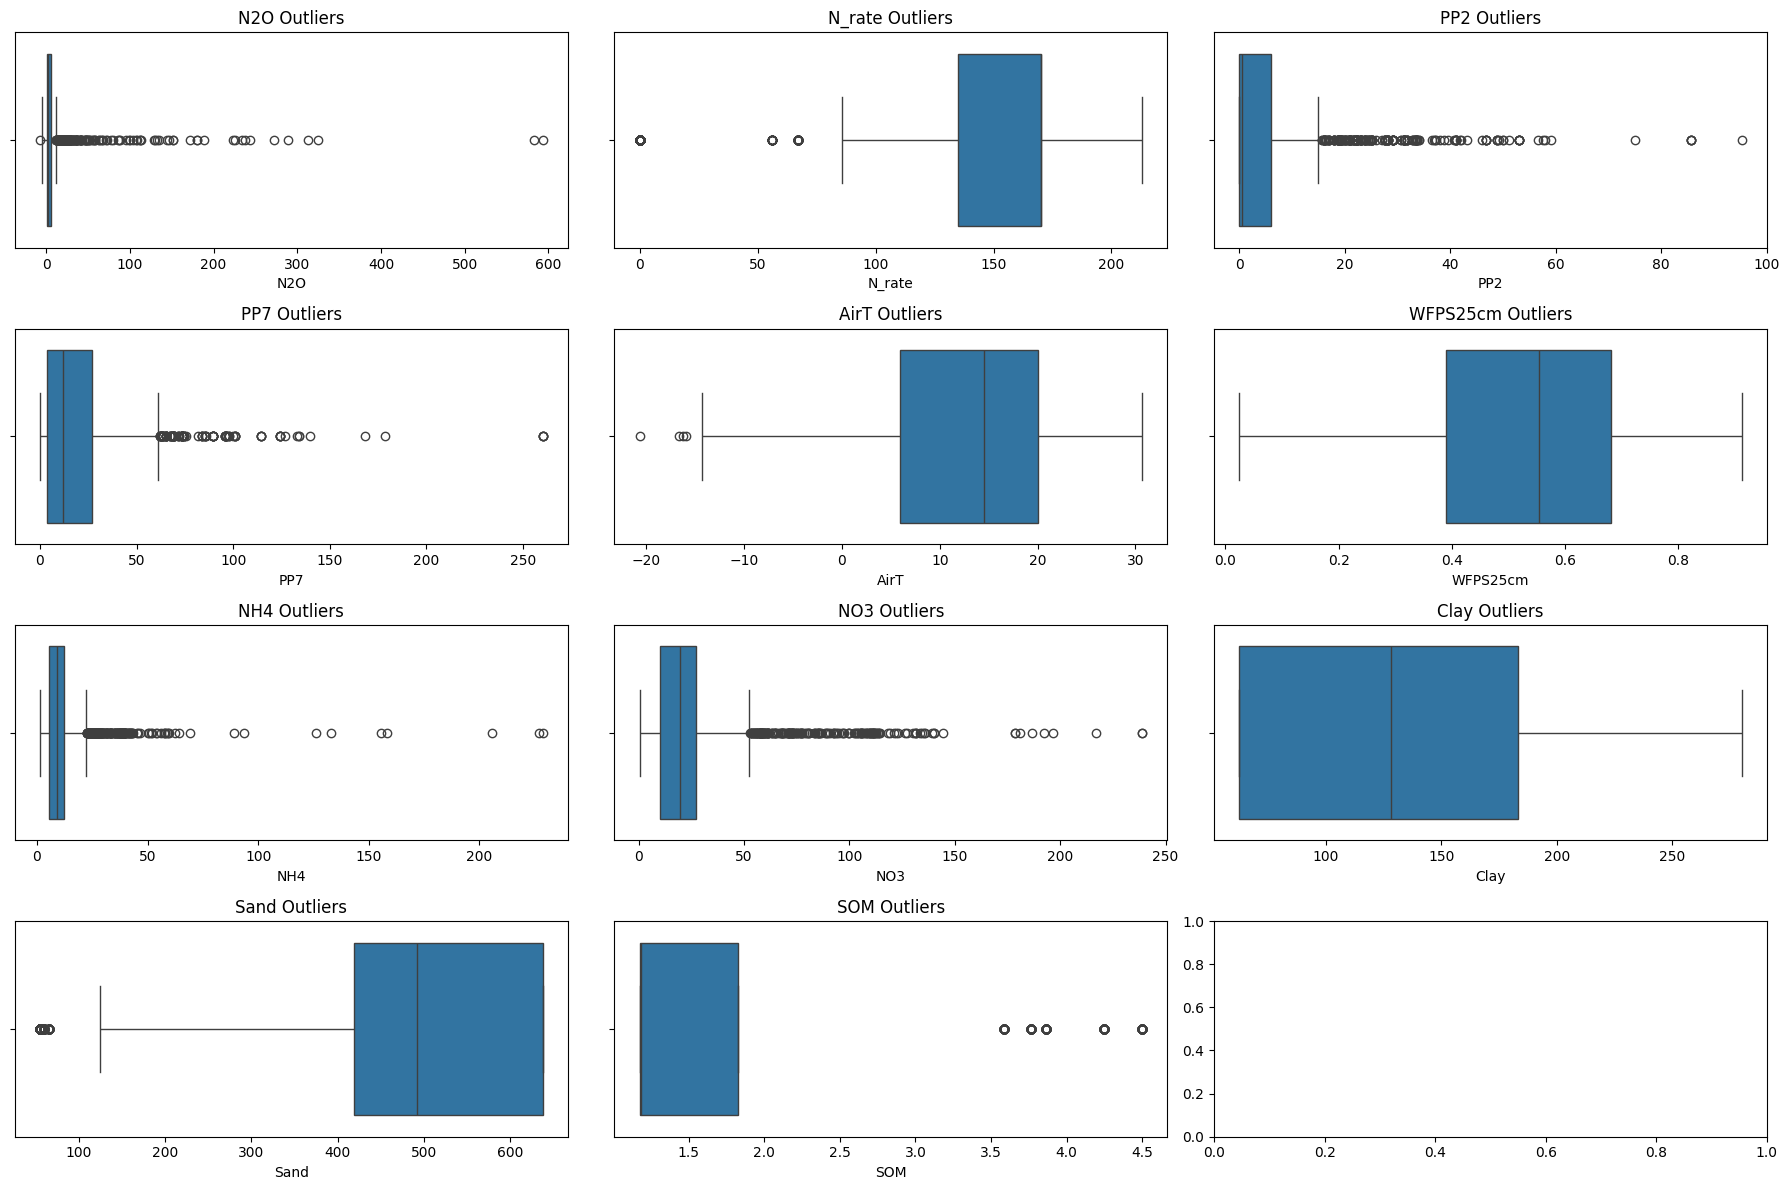

Number of multivariate outliers: 0


In [20]:
df=data
# Define the numerical columns
numerical_cols = ['N2O', 'N_rate', 'PP2', 'PP7', 'AirT', 'WFPS25cm', 'NH4', 'NO3', 'Clay', 'Sand', 'SOM']

# 1. Identify outliers using the Z-score method
z_scores = {}
for col in numerical_cols:
    z = np.abs((df[col] - df[col].mean()) / df[col].std())
    z_scores[col] = z

# Define the threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Create a boolean mask to identify outliers
outlier_mask = pd.DataFrame({col: z_scores[col] > threshold for col in numerical_cols})

# Print the number of outliers for each column
print("Number of outliers per column:")
print(outlier_mask.sum())

# 2. Visualize the outliers using boxplots
fig, axes = plt.subplots(4, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"{col} Outliers")

plt.tight_layout()
plt.show()

# 3. Identify potential multivariate outliers using Mahalanobis distance
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

X = df[numerical_cols].values
cov_mat = np.cov(X.T)
inv_cov_mat = np.linalg.inv(cov_mat)

# Calculate the Mahalanobis distance for each data point
mahal_dists = [mahalanobis(x, X.mean(axis=0), inv_cov_mat) for x in X]

# Determine the outlier threshold based on the chi-square distribution
p = len(numerical_cols)
threshold = chi2.isf(0.01, df=p)

# Create a boolean mask to identify multivariate outliers
multivariate_outlier_mask = np.array(mahal_dists) > threshold

# Print the number of multivariate outliers
print(f"Number of multivariate outliers: {sum(multivariate_outlier_mask)}")

Number of outliers per column:
N2O         251
N_rate      283
PP2         244
PP7         114
AirT          4
WFPS25cm      0
NH4         193
NO3         197
Clay          0
Sand        385
SOM         482
dtype: int64


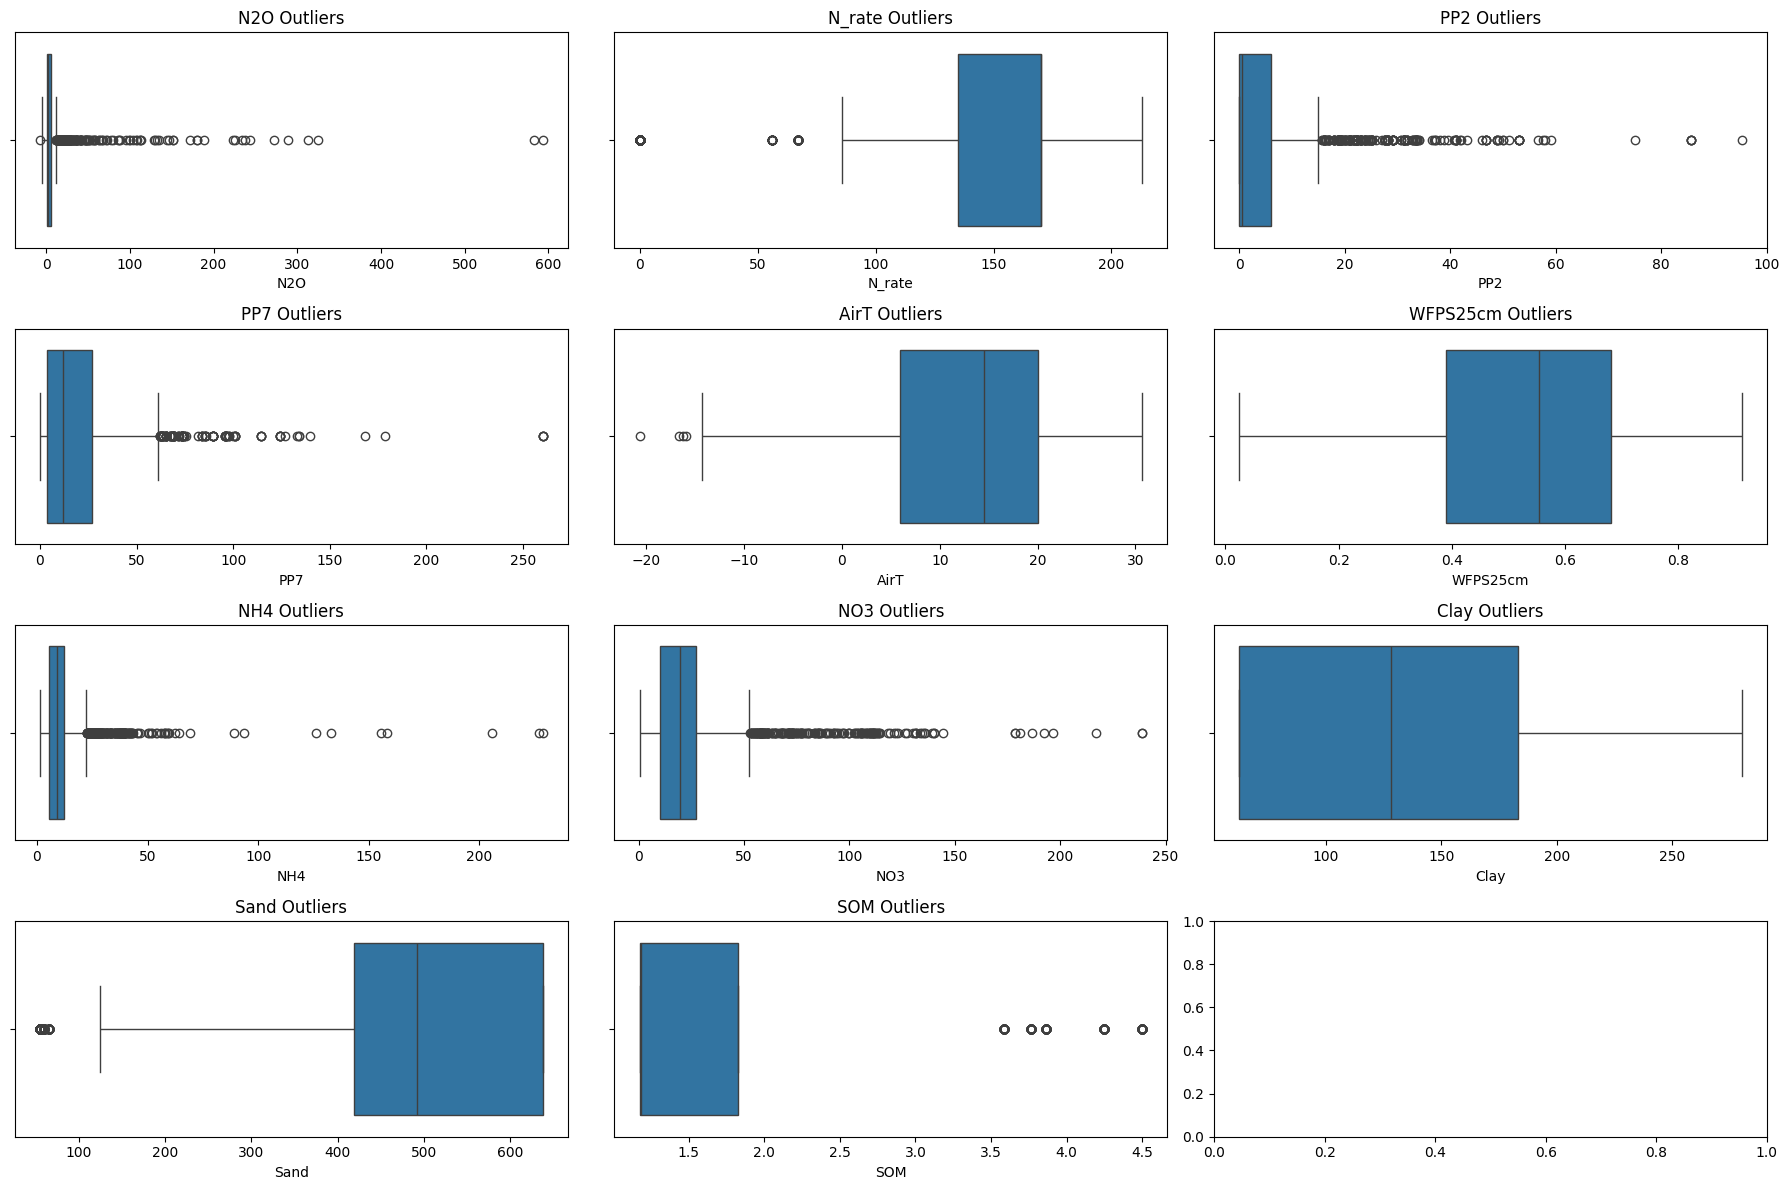

In [21]:
# Define the numerical columns
numerical_cols = ['N2O', 'N_rate', 'PP2', 'PP7', 'AirT', 'WFPS25cm', 'NH4', 'NO3', 'Clay', 'Sand', 'SOM']

# Detect outliers using the IQR method
outlier_mask = pd.DataFrame()
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_mask[col] = outliers

# Print the number of outliers for each column
print("Number of outliers per column:")
print(outlier_mask.sum())

# Visualize the outliers using boxplots
fig, axes = plt.subplots(4, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"{col} Outliers")

plt.tight_layout()
plt.show()

## Malahobis Distance Outliers Detection

Number of outliers: 6


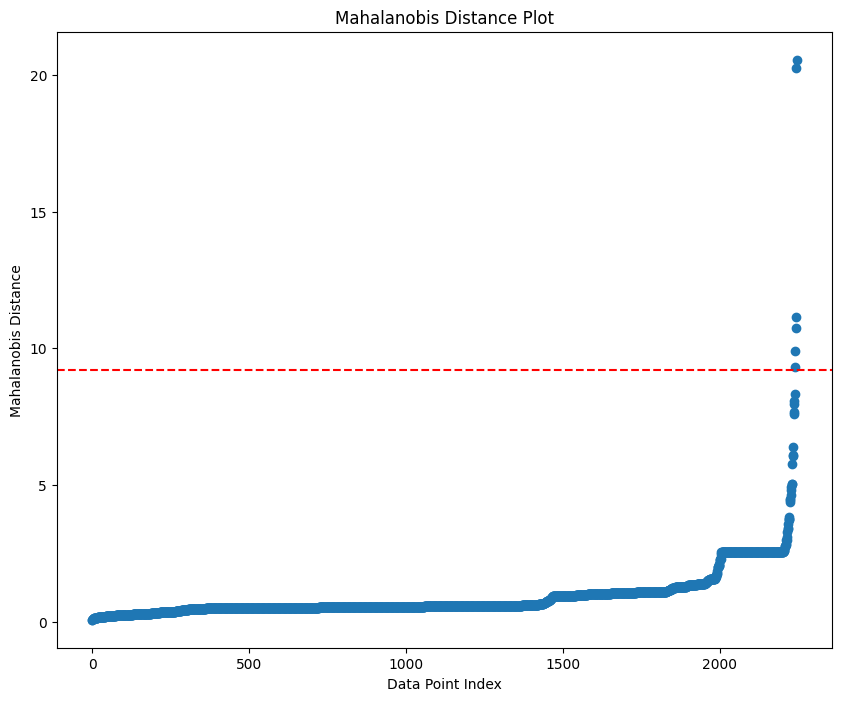

In [24]:
# Define the numerical columns
numerical_cols = ['N2O', 'N_rate'] #, 'PP2', 'PP7', 'AirT', 'WFPS25cm', 'NH4', 'NO3', 'Clay', 'Sand', 'SOM']
# numerical_cols = ['N2O']

# Detect outliers using the Mahalanobis distance
X = df[numerical_cols].values
cov_mat = np.cov(X.T)
inv_cov_mat = np.linalg.inv(cov_mat)

# Calculate the Mahalanobis distance for each data point
mahal_dists = [mahalanobis(x, X.mean(axis=0), inv_cov_mat) for x in X]

# Determine the outlier threshold based on the chi-square distribution
p = len(numerical_cols)
threshold = chi2.isf(0.01, df=p)

# Create a boolean mask to identify outliers
outlier_mask = np.array(mahal_dists) > threshold

# Print the number of outliers
print(f"Number of outliers: {sum(outlier_mask)}")

# Visualize the outliers using a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(range(len(mahal_dists)), sorted(mahal_dists))
plt.axhline(y=threshold, color='r', linestyle='--')
plt.title('Mahalanobis Distance Plot')
plt.xlabel('Data Point Index')
plt.ylabel('Mahalanobis Distance')
plt.show()

## Isolation Forest

Number of outliers: 23


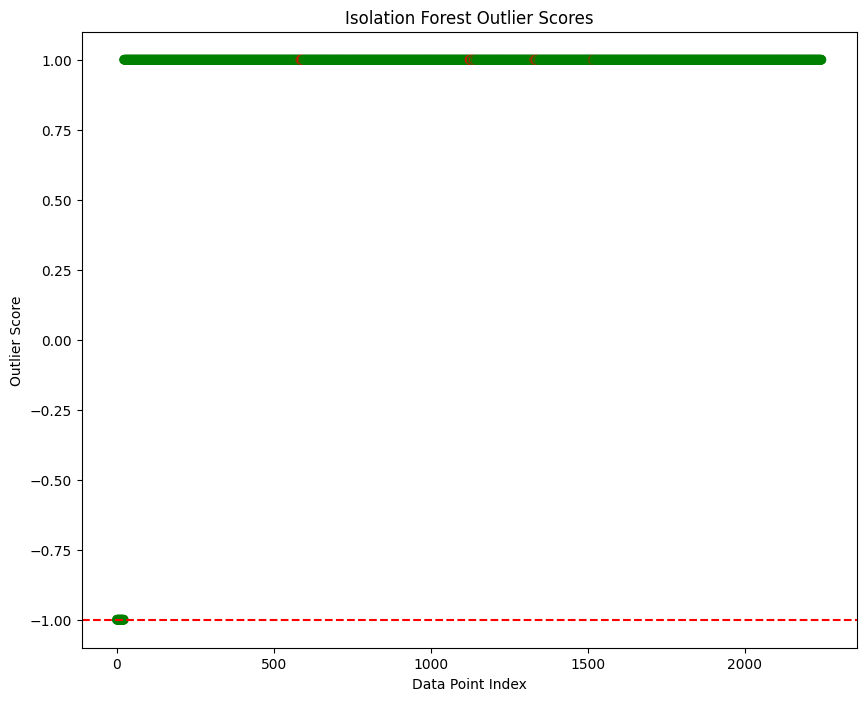

In [28]:
df=data
# Define the numerical columns
numerical_cols = ['N2O'] # 'N_rate', 'PP2', 'PP7', 'AirT', 'WFPS25cm', 'NH4', 'NO3', 'Clay', 'Sand', 'SOM']

# Handle missing values using the mean imputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df[numerical_cols])

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outlier_scores = iso_forest.fit_predict(X)

# Create a boolean mask to identify outliers
outlier_mask = outlier_scores == -1

# Print the number of outliers
print(f"Number of outliers: {sum(outlier_mask)}")

# Visualize the outliers using a scatter plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(range(len(outlier_scores)), sorted(outlier_scores), c=['g' if score == 1 else 'r' for score in outlier_scores])
plt.axhline(y=-1, color='r', linestyle='--')
plt.title('Isolation Forest Outlier Scores')
plt.xlabel('Data Point Index')
plt.ylabel('Outlier Score')
plt.show()

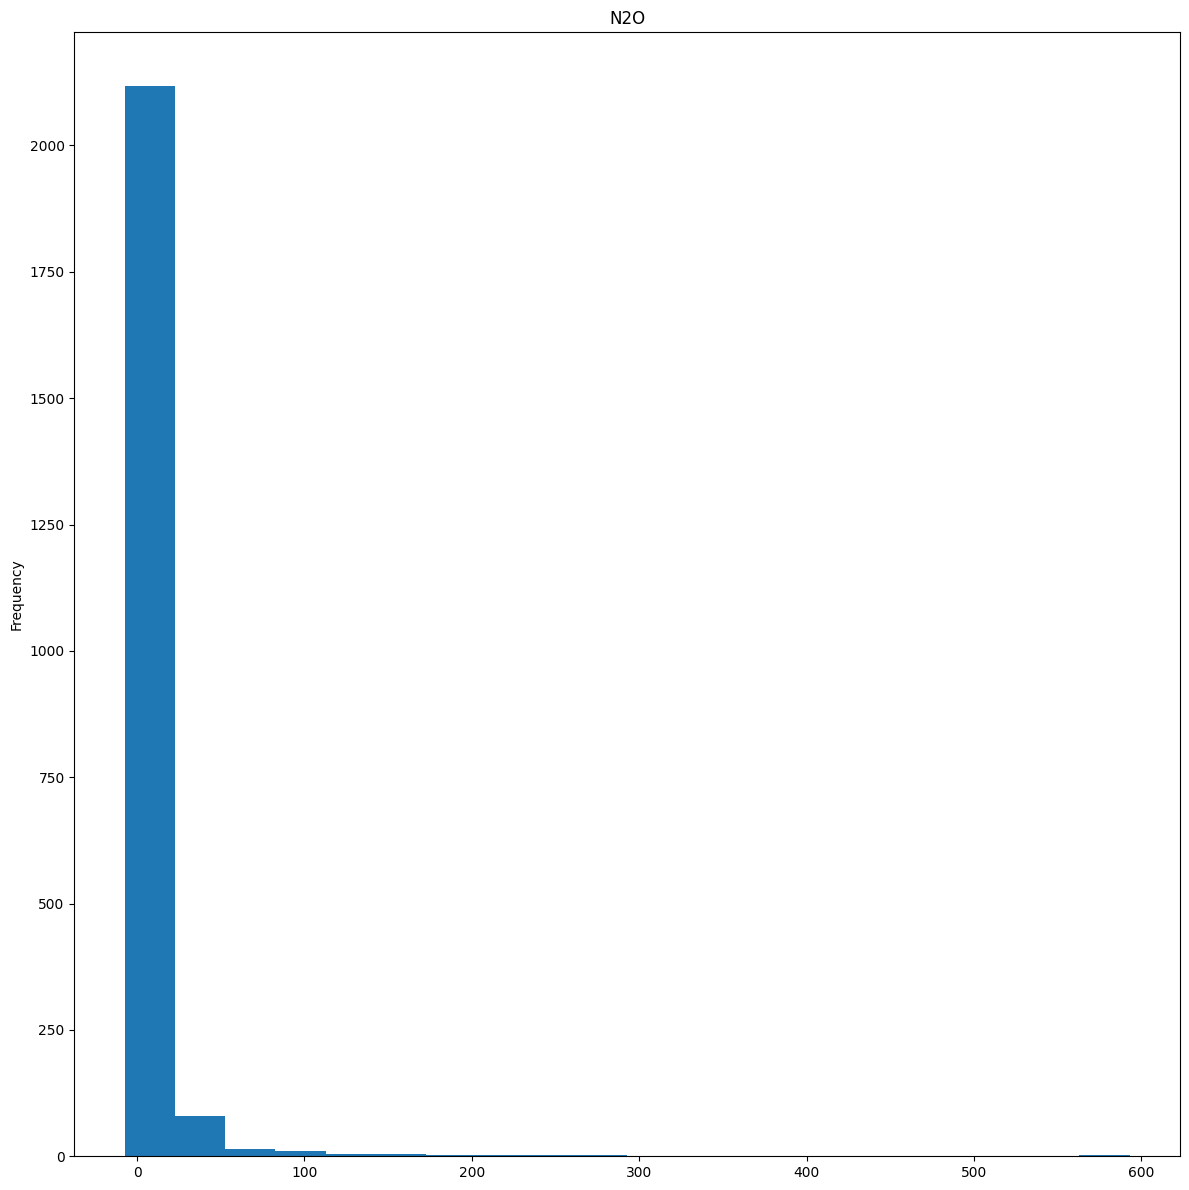

In [31]:
# Create a boolean mask to identify outliers
outlier_mask = outlier_scores == -1

# Visualize the outliers using a scatter plot matrix
plt.figure(figsize=(12, 12))
num_cols = len(numerical_cols)
for i in range(num_cols):
    for j in range(num_cols):
        if i == j:
            # Plot the histogram for the diagonal subplots
            plt.subplot(num_cols, num_cols, i * num_cols + j + 1)
            df[numerical_cols[i]].plot(kind='hist', bins=20, title=numerical_cols[i])
        else:
            # Plot the scatter plot for the off-diagonal subplots
            plt.subplot(num_cols, num_cols, i * num_cols + j + 1)
            plt.scatter(df[numerical_cols[j]], df[numerical_cols[i]], c=['g' if outlier_scores[k] == 1 else 'r' for k in range(len(outlier_scores))], s=10, alpha=0.5)
            plt.xlabel(numerical_cols[j])
            plt.ylabel(numerical_cols[i])

plt.tight_layout()
plt.show()


In [34]:
# Visualize the outliers using a scatter plot
plt.figure(figsize=(3, 2))
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        plt.subplot(3, 4, i * (len(numerical_cols)-1) + j - i + 1)
        plt.scatter(df[numerical_cols[j]], df[numerical_cols[i]], c=['g' if score == 1 else 'r' for score in outlier_scores], s=10, alpha=0.5)
        plt.xlabel(numerical_cols[j])
        plt.ylabel(numerical_cols[i])
        plt.title(f"{numerical_cols[i]} vs {numerical_cols[j]}")

plt.tight_layout()
plt.show()

<Figure size 300x200 with 0 Axes>

## Z-score

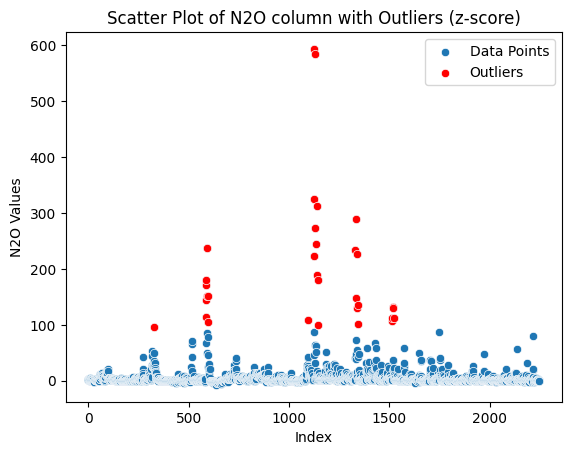

In [39]:
# Assuming you have a DataFrame called df containing the tabular data
n2o_column = df['N2O']

# Calculate the z-scores
z_scores = (n2o_column - n2o_column.mean()) / n2o_column.std()

# Define the z-score threshold for outliers
threshold_z_score = 3

# Detect outliers
outliers_z_score = n2o_column[abs(z_scores) > threshold_z_score]

# Create a scatter plot of the N2O column
sns.scatterplot(x=n2o_column.index, y=n2o_column, label='Data Points')

# Highlight the outliers using red color
sns.scatterplot(x=outliers_z_score.index, y=outliers_z_score, color='red', label='Outliers')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('N2O Values')
plt.title('Scatter Plot of N2O column with Outliers (z-score)')

# Show the plot
plt.legend()
plt.show()

## Tuckey Fences

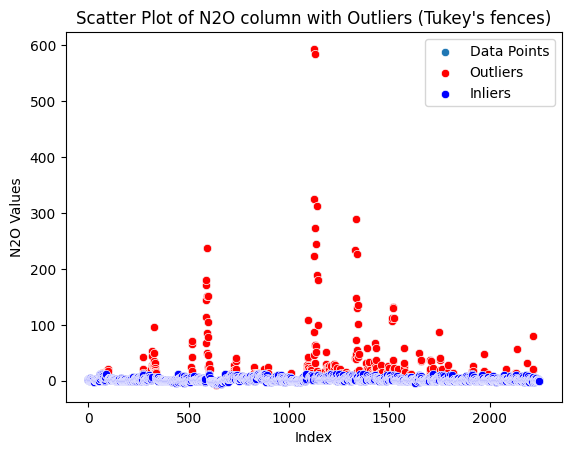

In [40]:
# Assuming you have a DataFrame called df containing the tabular data
n2o_column = df['N2O']

# Calculate the IQR
Q1 = n2o_column.quantile(0.25)
Q3 = n2o_column.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Detect outliers
outliers_tukey = n2o_column[(n2o_column < lower_fence) | (n2o_column > upper_fence)]

# Create a scatter plot of the N2O column
sns.scatterplot(x=n2o_column.index, y=n2o_column, label='Data Points')

# Highlight the outliers using red color
sns.scatterplot(x=outliers_tukey.index, y=outliers_tukey, color='red', label='Outliers')

# Highlight the data points within the fences using blue color
inliers_tukey = n2o_column[(n2o_column >= lower_fence) & (n2o_column <= upper_fence)]
sns.scatterplot(x=inliers_tukey.index, y=inliers_tukey, color='blue', label='Inliers')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('N2O Values')
plt.title('Scatter Plot of N2O column with Outliers (Tukey\'s fences)')

# Show the plot
plt.legend()
plt.show()

## LOF

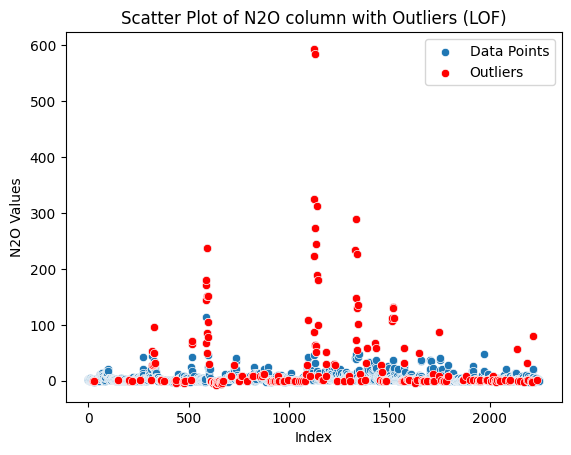

In [41]:
from sklearn.neighbors import LocalOutlierFactor

# Assuming you have a DataFrame called df containing the tabular data
# n2o_column = df['N2O']

# Reshape the data into a 2D array for LOF input
X = np.array(n2o_column).reshape(-1, 1)

# Create an instance of the LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Adjust parameters as needed

# Fit the LOF model and calculate LOF scores
lof_scores = lof.fit_predict(X)

# Identify outliers based on negative LOF scores
outliers_lof = n2o_column[lof_scores == -1]

# Create a scatter plot of the N2O column
sns.scatterplot(x=n2o_column.index, y=n2o_column, label='Data Points')

# Highlight the outliers using red color
sns.scatterplot(x=outliers_lof.index, y=outliers_lof, color='red', label='Outliers')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('N2O Values')
plt.title('Scatter Plot of N2O column with Outliers (LOF)')

# Show the plot
plt.legend()
plt.show()

In [52]:
from scipy.stats import iqr
from scipy.spatial.distance import mahalanobis


In [53]:
df

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012-02-09,2012,BCSE_KBS,Building,R1,2,Corn,Annual,3.896742,170,...,0.00,-2.00,276,241,0.666508,11.046340,22.940812,62.500000,637.500000,1.174072
1,2012-02-10,2012,BCSE_KBS,Building,R1,2,Corn,Annual,2.190218,170,...,0.00,-2.40,277,242,0.640608,11.008087,22.959578,62.500000,637.500000,1.174072
2,2012-02-18,2012,BCSE_KBS,Building,R1,2,Corn,Annual,3.542594,170,...,8.64,0.30,285,250,0.728085,10.831669,23.221928,62.500000,637.500000,1.174072
3,2012-02-19,2012,BCSE_KBS,Building,R1,2,Corn,Annual,3.342870,170,...,8.13,-3.80,286,251,0.686872,10.849792,23.271978,62.500000,637.500000,1.174072
4,2012-03-16,2012,BCSE_KBS,Building,R1,3,Corn,Annual,2.947778,170,...,8.39,17.60,312,277,0.716221,10.204748,24.206855,62.500000,637.500000,1.174072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,2013-10-16,2013,MCSE-T2,Testing,R4,10,TRIAE,Annual,1.640000,91,...,8.13,10.81,167,167,0.390203,17.061793,5.803681,128.333333,491.666667,1.806000
2242,2013-11-15,2013,MCSE-T2,Testing,R1,11,TRIAE,Annual,0.990000,91,...,8.13,5.64,197,197,0.317040,5.624730,5.429873,162.500000,490.375000,1.496400
2243,2013-11-15,2013,MCSE-T2,Testing,R2,11,TRIAE,Annual,-0.200000,91,...,8.13,5.64,197,197,0.341428,3.504328,7.239000,183.250000,432.875000,1.186800
2244,2013-11-15,2013,MCSE-T2,Testing,R3,11,TRIAE,Annual,0.300000,91,...,8.13,5.64,197,197,0.365815,3.636931,8.434294,169.833333,418.833333,1.823200


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:1081: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


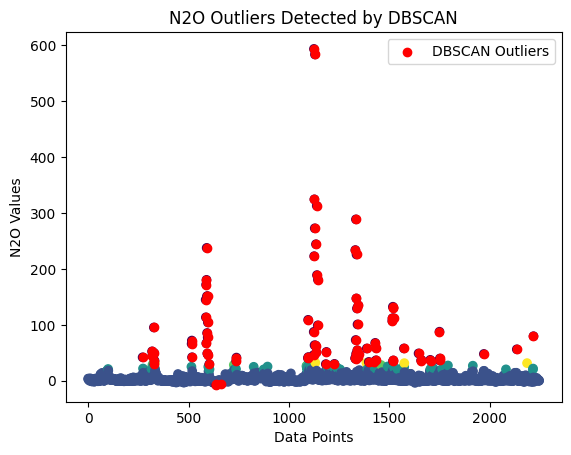

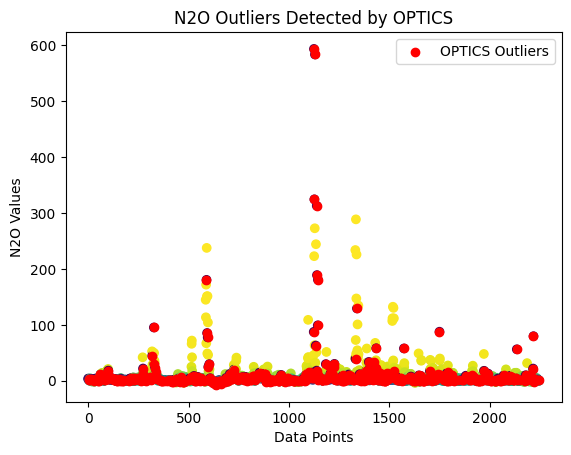

In [57]:
from sklearn.cluster import DBSCAN, OPTICS
# Extract the N2O column
# n2o_values = df['N2O'].values.reshape(-1, 1)

# Apply DBSCAN clustering to detect outliers
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(n2o_values)

# Get the outlier indices from DBSCAN
dbscan_outliers = np.where(dbscan.labels_ == -1)[0]

# Apply OPTICS clustering to detect outliers
optics = OPTICS(eps=0.5, min_samples=5)
optics.fit(n2o_values)

# Get the outlier indices from OPTICS
optics_outliers = np.where(optics.labels_ == -1)[0]

# Visualize the N2O values with outliers marked using DBSCAN
plt.scatter(range(len(n2o_values)), n2o_values, c=dbscan.labels_, cmap='viridis')
plt.scatter(dbscan_outliers, n2o_values[dbscan_outliers], c='red', label='DBSCAN Outliers')
plt.xlabel('Data Points')
plt.ylabel('N2O Values')
plt.title('N2O Outliers Detected by DBSCAN')
plt.legend()
plt.show()

# Visualize the N2O values with outliers marked using OPTICS
plt.scatter(range(len(n2o_values)), n2o_values, c=optics.labels_, cmap='viridis')
plt.scatter(optics_outliers, n2o_values[optics_outliers], c='red', label='OPTICS Outliers')
plt.xlabel('Data Points')
plt.ylabel('N2O Values')
plt.title('N2O Outliers Detected by OPTICS')
plt.legend()
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:1081: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


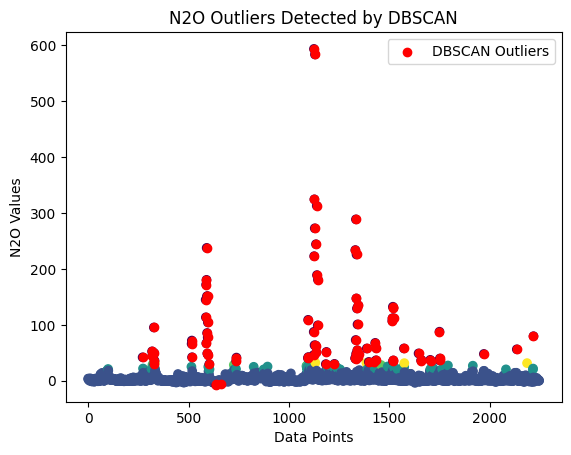

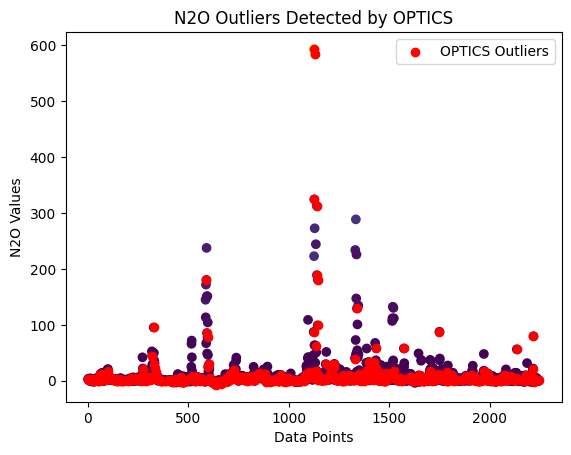

DBSCAN Outlier Table:
      Data Point  N2O Value  DBSCAN Cluster Label
271          271  41.942813                    -1
318          318  52.563836                    -1
319          319  44.874451                    -1
327          327  95.263745                    -1
328          328  49.745098                    -1
...          ...        ...                   ...
1750        1750  36.480000                    -1
1751        1751  39.810000                    -1
1970        1970  47.920000                    -1
2134        2134  56.240000                    -1
2217        2217  79.680000                    -1

[89 rows x 3 columns]

OPTICS Outlier Table:
   Data Point  N2O Value  OPTICS Reachability Distance
0           0   3.896742                           inf


In [61]:
# Extract the N2O column
n2o_values = df['N2O']

# Apply DBSCAN clustering to detect outliers
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(n2o_values.values.reshape(-1, 1))

# Get the outlier indices from DBSCAN
dbscan_outliers = np.where(dbscan.labels_ == -1)[0]

# Apply OPTICS clustering to detect outliers
optics = OPTICS(eps=0.5, min_samples=5)
optics.fit(n2o_values.values.reshape(-1, 1))

# Get the outlier indices from OPTICS
optics_outliers = np.where(optics.labels_ == -1)[0]

# Create pandas DataFrame tables for DBSCAN and OPTICS outlier results
dbscan_table = pd.DataFrame({'Data Point': df.index,
                             'N2O Value': n2o_values,
                             'DBSCAN Cluster Label': dbscan.labels_})
optics_table = pd.DataFrame({'Data Point': df.index,
                             'N2O Value': n2o_values,
                             'OPTICS Reachability Distance': optics.reachability_})

# Visualize DBSCAN outlier detection
plt.scatter(dbscan_table['Data Point'], dbscan_table['N2O Value'], c=dbscan_table['DBSCAN Cluster Label'], cmap='viridis')
plt.scatter(dbscan_outliers, dbscan_table.loc[dbscan_outliers, 'N2O Value'], c='red', label='DBSCAN Outliers')
plt.xlabel('Data Points')
plt.ylabel('N2O Values')
plt.title('N2O Outliers Detected by DBSCAN')
plt.legend()
plt.show()

# Visualize OPTICS outlier detection
plt.scatter(optics_table['Data Point'], optics_table['N2O Value'], c=optics_table['OPTICS Reachability Distance'], cmap='viridis')
plt.scatter(optics_outliers, optics_table.loc[optics_outliers, 'N2O Value'], c='red', label='OPTICS Outliers')
plt.xlabel('Data Points')
plt.ylabel('N2O Values')
plt.title('N2O Outliers Detected by OPTICS')
plt.legend()
plt.show()

# Print the DBSCAN outlier table
print("DBSCAN Outlier Table:")
print(dbscan_table[dbscan_table['DBSCAN Cluster Label'] == -1])

# Print the OPTICS outlier table
print("\nOPTICS Outlier Table:")
print(optics_table[optics_table['OPTICS Reachability Distance'] == np.inf])

In [63]:
dbscan_table.head(), optics_table.head()

(   Data Point  N2O Value  DBSCAN Cluster Label
 0           0   3.896742                     0
 1           1   2.190218                     0
 2           2   3.542594                     0
 3           3   3.342870                     0
 4           4   2.947778                     0,
    Data Point  N2O Value  OPTICS Reachability Distance
 0           0   3.896742                           inf
 1           1   2.190218                      0.006843
 2           2   3.542594                      0.017919
 3           3   3.342870                      0.015500
 4           4   2.947778                      0.013695)

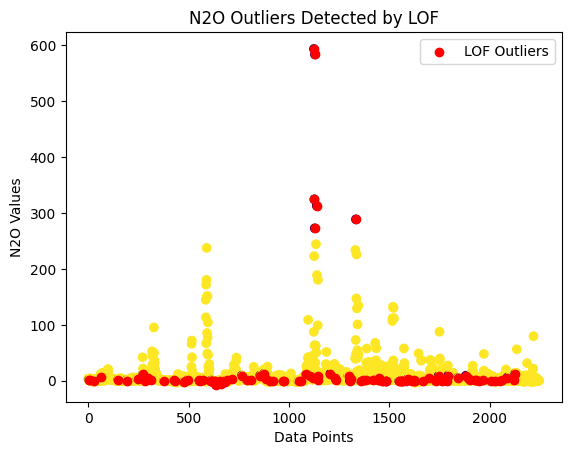

LOF Outlier Table:
           Date  Year Experiment   DataUse Replication  Month Vegetation  \
5    2012-03-17  2012   BCSE_KBS  Building          R1      3       Corn   
9    2012-04-20  2012   BCSE_KBS  Building          R1      4       Corn   
27   2012-06-11  2012   BCSE_KBS  Building          R1      6       Corn   
63   2012-07-21  2012   BCSE_KBS  Building          R1      7       Corn   
150  2012-10-17  2012   BCSE_KBS  Building          R1     10       Corn   
...         ...   ...        ...       ...         ...    ...        ...   
2051 2007-11-13  2007    MCSE-T2   Testing          R1     11      TRIAE   
2061 2009-05-08  2009    MCSE-T2   Testing          R1      5      GLYMX   
2087 2009-08-21  2009    MCSE-T2   Testing          R4      8      GLYMX   
2121 2010-06-10  2010    MCSE-T2   Testing          R3      6      TRIAE   
2126 2010-06-24  2010    MCSE-T2   Testing          R4      6      TRIAE   

     VegType        N2O  N_rate  ...     PP7   AirT  DAF_TD  DAF_SD 

In [64]:
# Extract the N2O column
n2o_values = df['N2O']

# Apply Local Outlier Factor (LOF) for outlier detection
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.05)
outlier_scores = lof.fit_predict(n2o_values.values.reshape(-1, 1))

# Get the outlier indices from LOF
outliers = df[outlier_scores == -1]

# Visualize LOF outlier detection
plt.scatter(df.index, n2o_values, c=outlier_scores, cmap='viridis')
plt.scatter(outliers.index, outliers['N2O'], c='red', label='LOF Outliers')
plt.xlabel('Data Points')
plt.ylabel('N2O Values')
plt.title('N2O Outliers Detected by LOF')
plt.legend()
plt.show()

# Print the LOF outlier table
print("LOF Outlier Table:")
print(outliers)

In [66]:
from pyod.models.cblof import CBLOF
# Extract the N2O column
n2o_values = df['N2O'].values.reshape(-1, 1)

# Apply CBLOF for outlier detection
cblof = CBLOF(contamination=0.05, check_estimator=False, random_state=0)
outlier_scores = cblof.fit_predict(n2o_values)

# Get the outlier indices from CBLOF
outliers = df[outlier_scores == 1]

# Visualize CBLOF outlier detection
plt.scatter(df.index, n2o_values, c=outlier_scores, cmap='viridis')
plt.scatter(outliers.index, outliers['N2O'], c='red', label='CBLOF Outliers')
plt.xlabel('Data Points')
plt.ylabel('N2O Values')
plt.title('N2O Outliers Detected by CBLOF')
plt.legend()
plt.show()

# Print the CBLOF outlier table
print("CBLOF Outlier Table:")
print(outliers)

ModuleNotFoundError: No module named 'pyod'